In [5]:
# packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [6]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../'))

# DL models (CNNs, RNNs, LSTM)
from LSTM import LSTMClassifier


In [7]:
# dataset
file_path = 'amazon_user_reviews_text_sentiment.parquet'
df = pd.read_parquet(file_path)
df.info()

# feature and target
features = "text_cleaned"
target = "sentiment"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     18400 non-null  int64 
 1   text_cleaned  18400 non-null  object
dtypes: int64(1), object(1)
memory usage: 287.6+ KB


DL: LSTM
Starting LSTM Classification Pipeline

[Step 1] Preprocessing data...
Word Index (first 20): {'br': 1, 'one': 2, 'like': 3, 'would': 4, 'good': 5, 'get': 6, 'use': 7, 'great': 8, 'time': 9, 'work': 10, 'really': 11, 'love': 12, 'well': 13, 'also': 14, 'much': 15, 'make': 16, 'even': 17, 'product': 18, 'book': 19, 'little': 20}
Sequences (first 3): [[155, 185, 80, 4, 1072, 1448], [1955, 891, 3950, 1845, 687, 1316, 98], [1983, 504, 40, 667, 438, 200, 3681, 737, 4926, 47, 3, 36, 438, 182, 65, 333, 21, 1, 1, 1073, 120, 43, 534, 516]]
Padded Sequences shape: (18400, 10)
One-hot Encoded Labels shape: (18400, 3)
X_train shape: (12328, 10), y_train shape: (12328, 3)
X_test shape: (6072, 10), y_test shape: (6072, 3)
✓ Data preprocessing completed

[Step 2] Building LSTM model...
Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

✓ Model built successfully

[Step 3] Training model...
Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4667 - loss: 1.0008 - val_accuracy: 0.5698 - val_loss: 0.8958
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6961 - loss: 0.7108 - val_accuracy: 0.5739 - val_loss: 0.9126
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7774 - loss: 0.5394 - val_accuracy: 0.5649 - val_loss: 1.0597
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8378 - loss: 0.3902 - val_accuracy: 0.5585 - val_loss: 1.3054
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8846 - loss: 0.2921 - val_accuracy: 0.5445 - val_loss: 1.8691
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9070 - loss: 0.2264 - val_accuracy: 0.5418 - val_loss: 2.0090
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9242 - loss: 0.1788 - val_accuracy: 0.5466 - val_loss: 2.4757
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/s

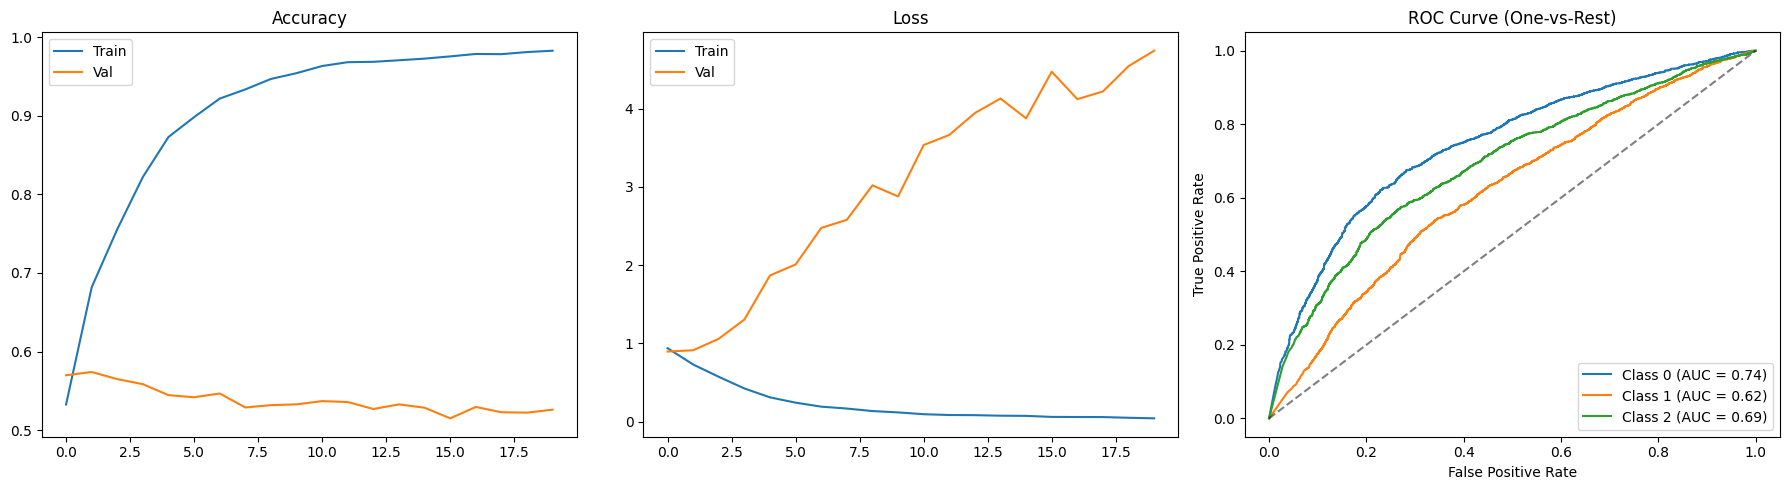


Pipeline execution completed!


In [8]:
# Model Training
# DL
print("DL: LSTM")

classifier = LSTMClassifier(vocab_size=10000, max_len=10, embedding_dim=128)
loss, accuracy = classifier.run_pipeline(
    df=df,
    text_column='text_cleaned',
    label_column=target,
    epochs=20,
    batch_size=32
)
